# Notebook for Parameter Testing of Status Economic Model
### Prepared by BlockScience

### Import Model Configuration Object

In [1]:
from src.sim import run
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

[{'N': 20, 'T': range(0, 100), 'M': {'block_time': 30, 'i_storage': 500, 'i_in_bandwidth': 1234, 'i_out_bandwidth': 140, 'j_storage': 500, 'i_wallet': 10000, 'j_in_bandwidth': 400, 'j_out_bandwidth': 100, 'j_wallet': 0, 'p_storage': 4000, 'p_in_bandwidth': 400, 'p_out_bandwidth': 600, 'p_wallet': 0, 'k_storage': 8000, 'k_in_bandwidth': 400, 'k_out_bandwidth': 80, 'k_wallet': 0, 'r_storage': 8000, 'r_in_bandwidth': 400, 'r_out_bandwidth': 80, 'r_wallet': 0, 'j_avail_to_i': 0.9, 'k_avail_to_i': 0.8, 'j_avail_to_k': 0.7, 'p_avail_to_i': 0.6, 'depth': 15, 'tax_%': 0.1, 'subsidy_escrow': 0.1, 'subsidy_treasury': 0.1, 'route_allocation': 0.1, 'store_allocation': 0.45, 'prove_allocation': 0.45, 'starting_treasury': 0, 'j_prove_likelihood': 0.95}}, {'N': 20, 'T': range(0, 100), 'M': {'block_time': 30, 'i_storage': 500, 'i_in_bandwidth': 1234, 'i_out_bandwidth': 140, 'j_storage': 500, 'i_wallet': 10000, 'j_in_bandwidth': 400, 'j_out_bandwidth': 100, 'j_wallet': 0, 'p_storage': 4000, 'p_in_bandw

### Run cadCAD Simulation

In [2]:
experiments = run.run()


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: multi_proc: [<cadCAD.configuration.Configuration object at 0x0000020072BCDD68>, <cadCAD.configuration.Configuration object at 0x0000020072BCDDD8>, <cadCAD.configuration.Configuration object at 0x0000020073EBCFD0>]
Configurations: [<cadCAD.configuration.Configuration object at 0x0000020072BCDD68>, <cadCAD.configuration.Configuration object at 0x0000020072BCDDD8>, <cadCAD.configuration.Configuration object at 0x0000020073EBCFD0>]


Collect some keys for investigation

In [3]:
first_key = max(experiments.dataset[0]['substep'])
last_time = max(experiments.dataset[0]['timestep'])
end_key = (len(experiments.dataset[0]) / max(experiments.dataset[0]['run']) -1) * max(experiments.dataset[0]['substep'])
twenty_time = max(experiments.dataset[0]['substep']) * 10 *2
fifty_time =  max(experiments.dataset[0]['substep']) * 50

Sample initiated message 'event':

In [4]:
print(experiments.dataset[0]['event'][twenty_time])

<class 'src.sim.model.utils.Event'>: {'sending_node': 'i', 'receiving_node': 'j', 'hash_file': 1617458272, 'size': 66, 'block_init': 20, 'escrow': 62}


Sample active message in 'history':

In [5]:
print(experiments.dataset[0]['history'][twenty_time].active[0])

<class 'src.sim.model.utils.Event'>: {'sending_node': 'i', 'receiving_node': 'j', 'hash_file': 1617458976, 'size': 88, 'block_init': 1, 'escrow': 81}


Sample located message in 'history':

In [6]:
print(experiments.dataset[0]['history'][twenty_time].located[0])

<class 'src.sim.model.utils.Event'>: {'sending_node': 'i', 'receiving_node': 'j', 'hash_file': 1617457920, 'size': 55, 'block_init': 4, 'escrow': 51, 'storing_node': 'k', 'block_locate': 6, 'time_to_find': 2}


Sample routed message in 'history':

In [7]:
print(experiments.dataset[0]['history'][twenty_time].routed[0])

<class 'src.sim.model.utils.Event'>: {'sending_node': 'i', 'receiving_node': 'j', 'hash_file': 1617457856, 'size': 53, 'block_init': 7, 'escrow': 45, 'storing_node': 'k', 'block_locate': 9, 'time_to_find': 2, 'route_list': [], 'block_route': 11, 'time_to_route': 2}


Sample paid message in 'history':

In [8]:
print(experiments.dataset[0]['history'][twenty_time].paid[0])

<class 'src.sim.model.utils.Event'>: {'sending_node': 'i', 'receiving_node': 'j', 'hash_file': 1617458592, 'size': 76, 'block_init': 9, 'escrow': 72, 'storing_node': 'k', 'block_locate': 11, 'time_to_find': 2, 'route_list': [], 'block_route': 13, 'time_to_route': 2, 'proving_node': 'j', 'block_prove': 14, 'time_to_prove': 1, 'total_time': 5}


Sample node 'k' in 'network': 

In [9]:
experiments.dataset[0]['network'][twenty_time].nodes['k']

{'neighbor_estimate': {'storage from i': 8,
  'messages from i': 0,
  'j_avail_to_k': array([0.7])},
 'storage_capacity': [8000],
 'current_storage': [[None, None, None],
  [None, None, None],
  [1617462208, 189, 1],
  [1617459840, 115, 1],
  [1617459424, 102, 1],
  [1617459328, 99, 1],
  [1617460032, 121, 1],
  [1617459232, 96, 1],
  [1617457152, 31, 1],
  [1617459488, 104, 1]],
 'current_capacity': 857,
 'inband': [400],
 'outband': [80],
 'message_history': [[None, None, None], [None, None, None]],
 'control': [],
 'wallet': array([252.]),
 'id': 7,
 'routing_table': [['i', 0, '0b0000', 7, '0b0'],
  ['j', 5, '0b0101', 2, '0b01'],
  ['k', 7, '0b0111', 0, '0b0111'],
  ['p', 0, '0b0000', 7, '0b0'],
  ['r', 1, '0b0001', 6, '0b0']]}

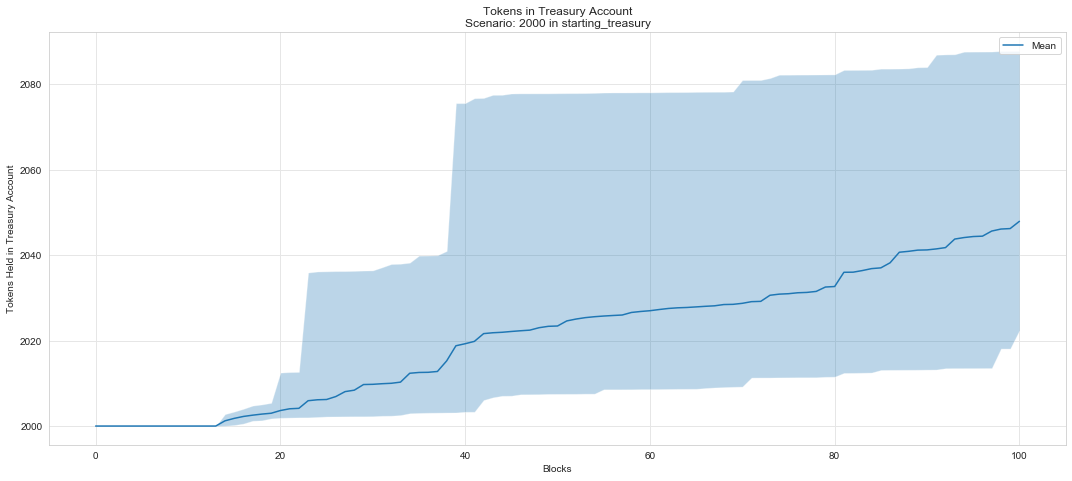

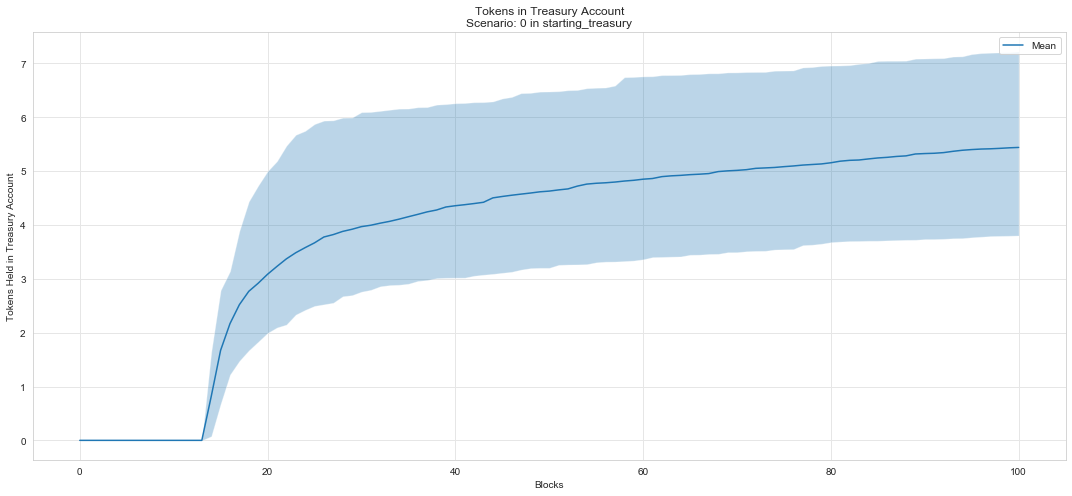

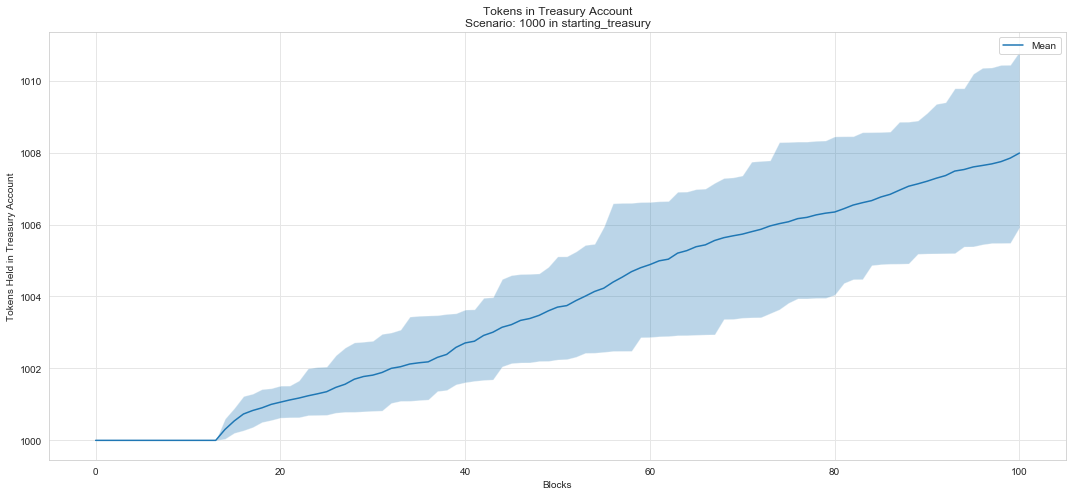

In [10]:
experiments = experiments.sort_values(['starting_treasury'])
cols = 1
rows = 1
cc_idx = 0
while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['starting_treasury']
    cc_label = experiments.iloc[cc_idx]['starting_treasury']
    sub_experiments = experiments[experiments['starting_treasury']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        df = df.groupby('timestep').agg({'treasury': ['min', 'mean', 'max']}).reset_index()
        
#         # named varying function
#         if experiment['xx_function']=='exponential_decay':
#             pass
# #         elif experiment['xx_function']=='random':
# #             pass
#         else:
#             continue

        ax = axs
        title = 'Tokens in Treasury Account' + '\n' + 'Scenario: ' + str(cc_label)  + ' in starting_treasury'
        ax.set_title(title)
        ax.set_ylabel('Tokens Held in Treasury Account')
        df.plot(x='timestep', y=('treasury','mean'), label='Mean', ax=ax, legend=True)
        ax.fill_between(df.timestep, df[('treasury','min')], df[('treasury','max')], alpha=0.3)        
        ax.set_xlabel('Blocks')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

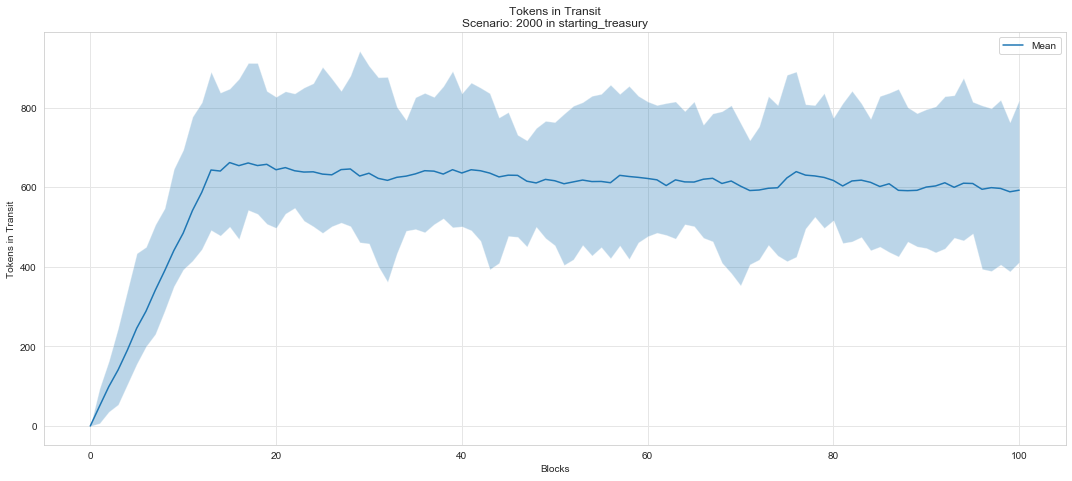

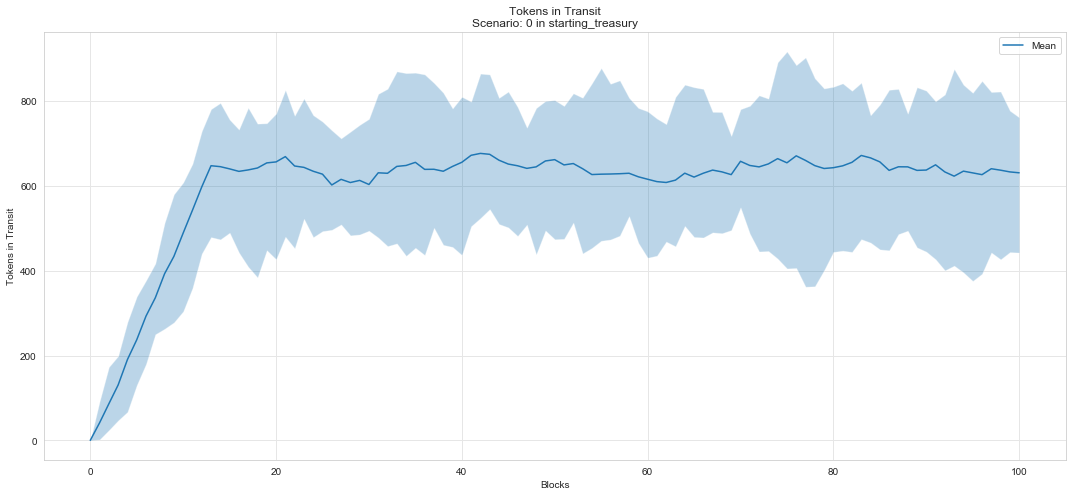

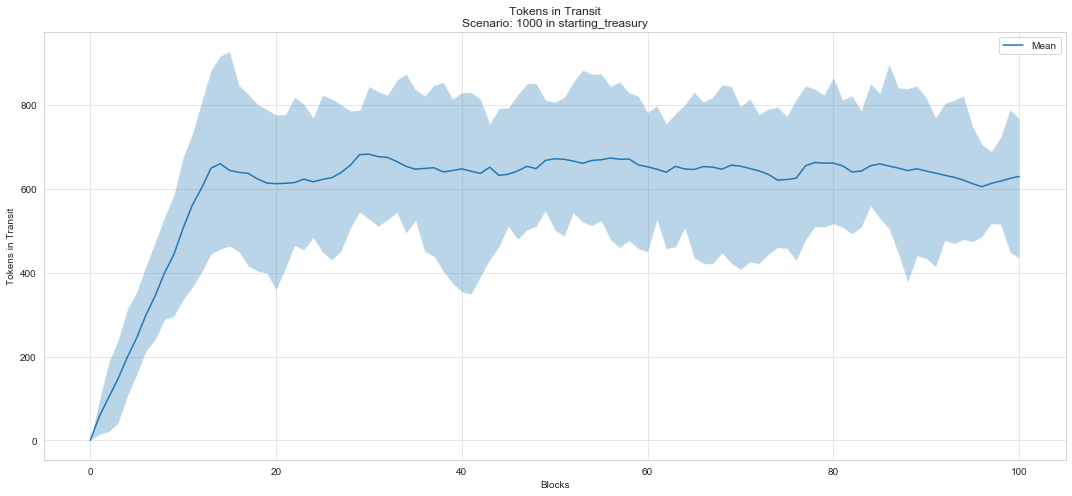

In [11]:
experiments = experiments.sort_values(['starting_treasury'])
cols = 1
rows = 1
cc_idx = 0
while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['starting_treasury']
    cc_label = experiments.iloc[cc_idx]['starting_treasury']
    sub_experiments = experiments[experiments['starting_treasury']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        df = df.groupby('timestep').agg({'transit': ['min', 'mean', 'max']}).reset_index()
        
#         # named varying function
#         if experiment['xx_function']=='exponential_decay':
#             pass
# #         elif experiment['xx_function']=='random':
# #             pass
#         else:
#             continue

        ax = axs
        title = 'Tokens in Transit' + '\n' + 'Scenario: ' + str(cc_label)  + ' in starting_treasury'
        ax.set_title(title)
        ax.set_ylabel('Tokens in Transit')
        df.plot(x='timestep', y=('transit','mean'), label='Mean', ax=ax, legend=True)
        ax.fill_between(df.timestep, df[('transit','min')], df[('transit','max')], alpha=0.3)        
        ax.set_xlabel('Blocks')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

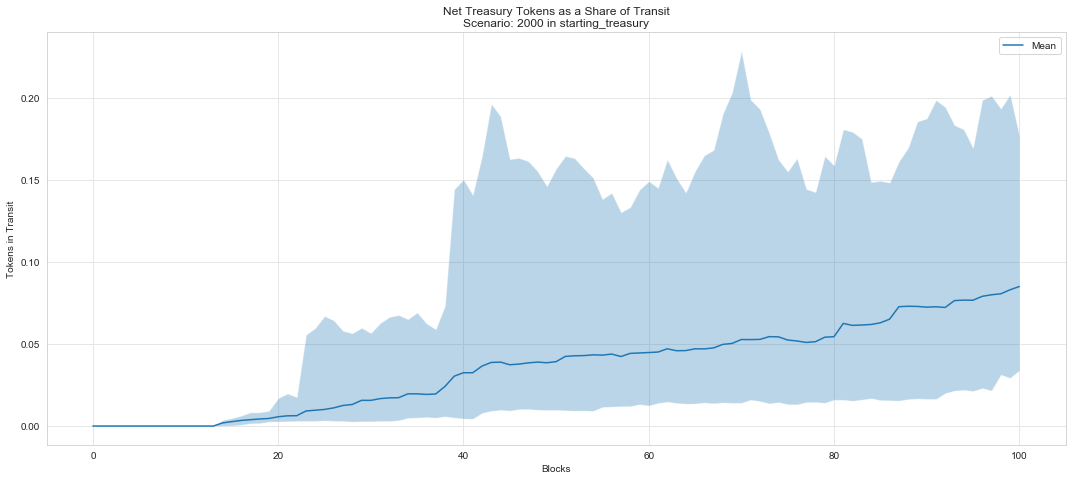

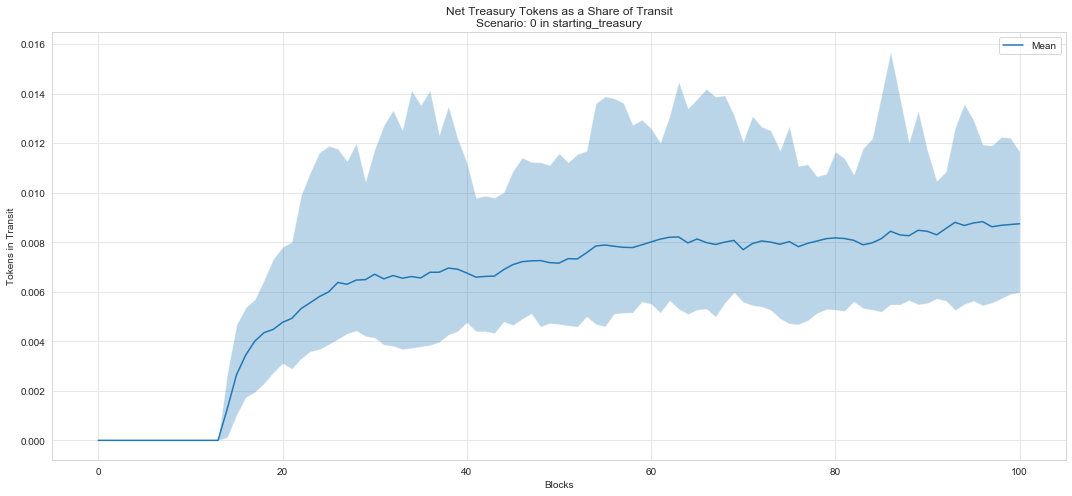

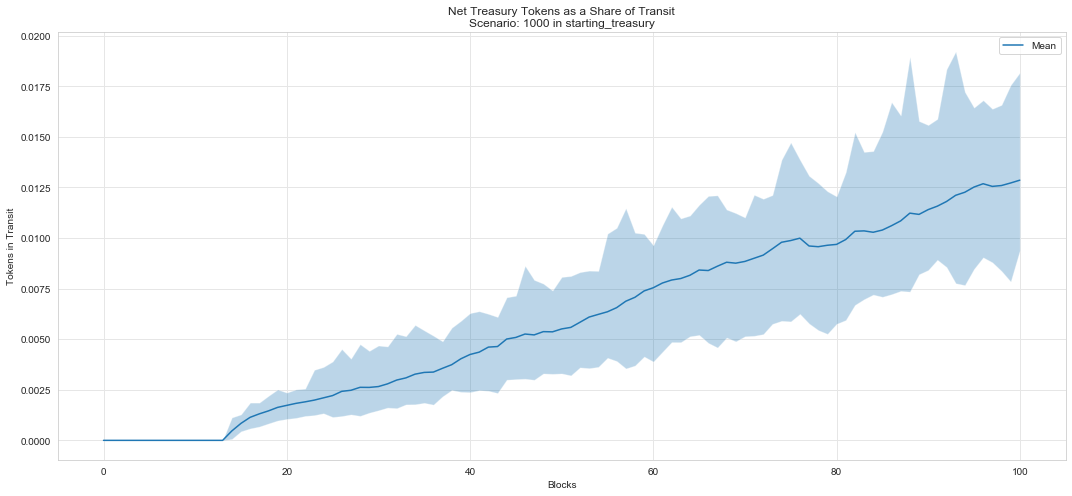

In [12]:
experiments = experiments.sort_values(['starting_treasury'])
cols = 1
rows = 1
cc_idx = 0
while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['starting_treasury']
    cc_label = experiments.iloc[cc_idx]['starting_treasury']
    sub_experiments = experiments[experiments['starting_treasury']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        df['treasury_share'] = (df['treasury'] - cc_label) / (df['transit'] + 1)
        df = df.groupby('timestep').agg({'treasury_share': ['min', 'mean', 'max']}).reset_index()
        
#         # named varying function
#         if experiment['xx_function']=='exponential_decay':
#             pass
# #         elif experiment['xx_function']=='random':
# #             pass
#         else:
#             continue

        ax = axs
        title = 'Net Treasury Tokens as a Share of Transit' + '\n' + 'Scenario: ' + str(cc_label)  + ' in starting_treasury'
        ax.set_title(title)
        ax.set_ylabel('Tokens in Transit')
        df.plot(x='timestep', y=('treasury_share','mean'), label='Mean', ax=ax, legend=True)
        ax.fill_between(df.timestep, df[('treasury_share','min')], df[('treasury_share','max')], alpha=0.3)        
        ax.set_xlabel('Blocks')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

#### Polar Angle Distribution of Solved Routes

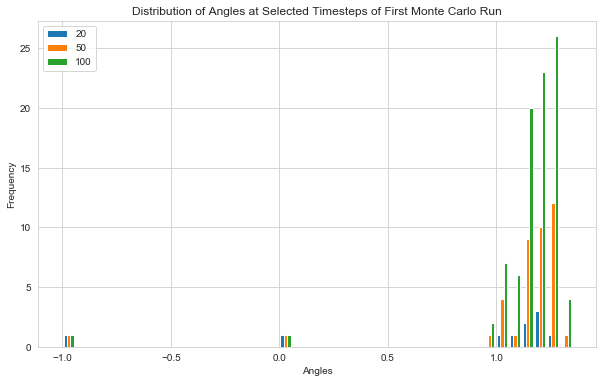

In [13]:
plt.figure(figsize=(10,6)) # plt.plot(bound2)

plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.title('Distribution of Angles at Selected Timesteps of First Monte Carlo Run')

plt.hist([experiments.dataset[0]['angles'][twenty_time], experiments.dataset[0]['angles'][fifty_time], \
          experiments.dataset[0]['angles'][end_key]], bins = 40, label =['20','50',str(last_time)])
plt.legend()
plt.show()

#### Z-Score Distribution of Angles of Solved Routes

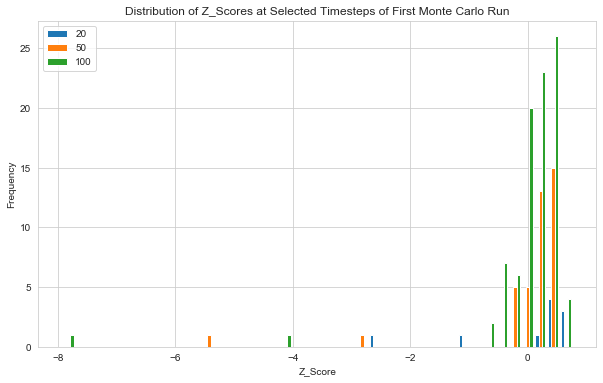

In [14]:
plt.figure(figsize=(10,6))
plt.xlabel('Z_Score')
plt.ylabel('Frequency')
plt.title('Distribution of Z_Scores at Selected Timesteps of First Monte Carlo Run')

plt.hist([experiments.dataset[0]['zees'][twenty_time], experiments.dataset[0]['zees'][fifty_time], \
          experiments.dataset[0]['zees'][end_key]], bins = 40, label =['20','50',str(last_time)])
plt.legend()
plt.show()

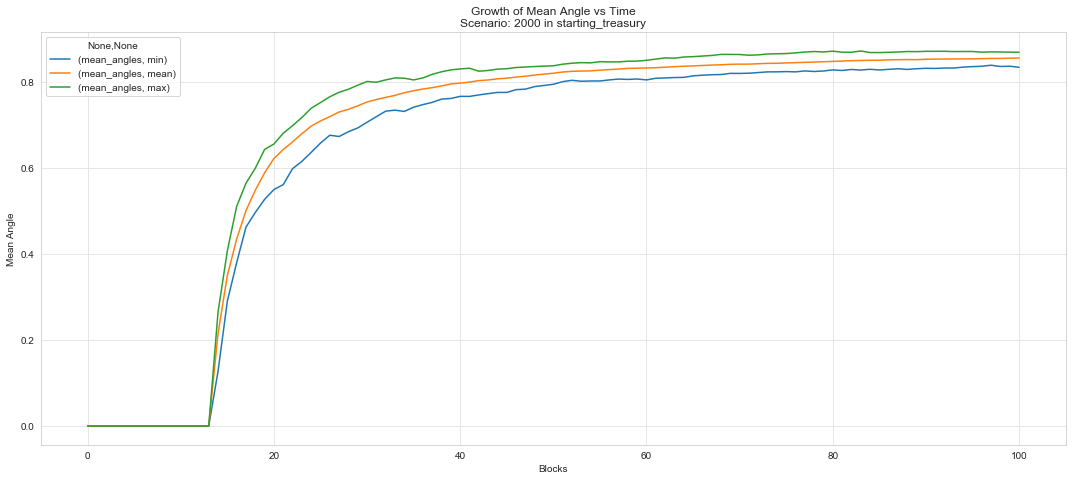

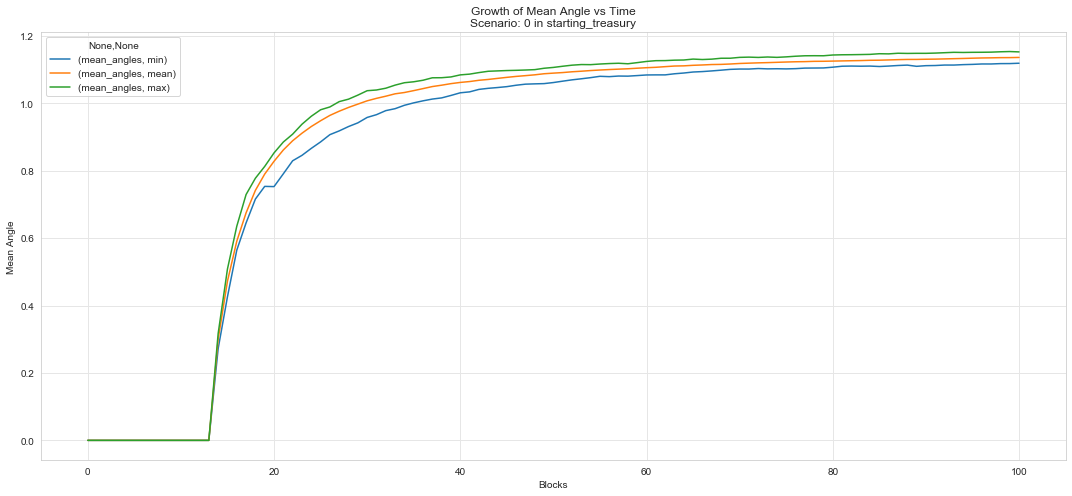

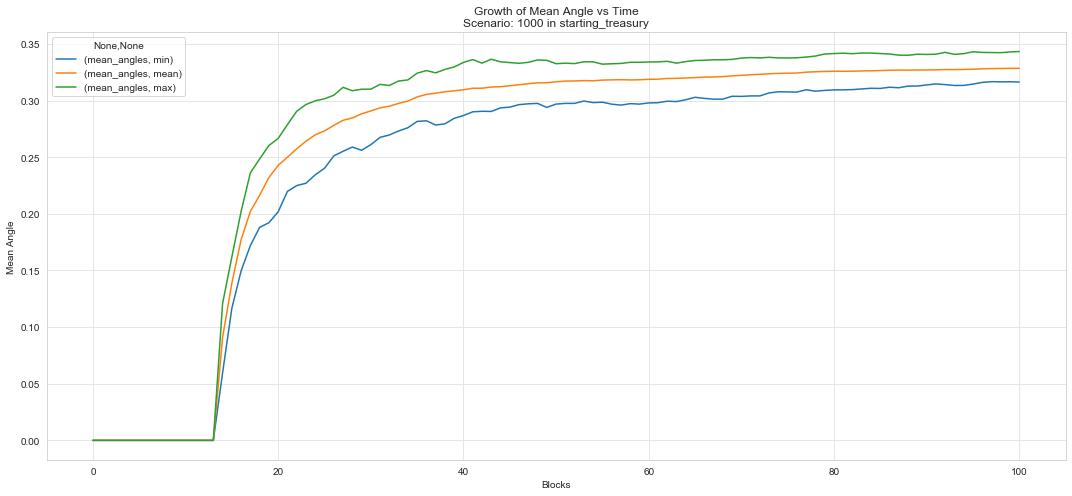

In [15]:
experiments = experiments.sort_values(['starting_treasury'])
cols = 1
rows = 1
cc_idx = 0
while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['starting_treasury']
    cc_label = experiments.iloc[cc_idx]['starting_treasury']
    sub_experiments = experiments[experiments['starting_treasury']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        df['mean_angles'] = df.angles.apply(lambda x: x.mean())
        df['mean_zees'] = df.zees.apply(lambda x: x.mean())

        df_a = df.groupby('timestep').agg({'mean_angles': ['min', 'mean', 'max']})
        df_z = df.groupby('timestep').agg({'mean_zees': ['min', 'mean', 'max']})
        
        
#         last_time = max(df.timestep)
#         df = df[df.timestep == last_time]

#         df_a.plot()
    
#         # named varying function
#         if experiment['xx_function']=='exponential_decay':
#             pass
# #         elif experiment['xx_function']=='random':
# #             pass
#         else:
#             continue

#         axs.plot(df_a.mean_angles)
#         axs.plot(df_z.mean_zees)
        ax = axs
        title = 'Growth of Mean Angle vs Time' + '\n' + 'Scenario: ' + str(cc_label)  + ' in starting_treasury'

        ax.set_title(title)
        ax.set_ylabel('Mean Angle')
        df_a.plot(label='Mean', ax=ax, legend=True)
#         df_z.plot(label='Mean', ax=ax, legend=True)
#         ax.fill_between(df_a.timestep, df[('treasury','min')], df[('treasury','max')], alpha=0.3)        
        ax.set_xlabel('Blocks')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

#### For generating new plots:

In [16]:
# experiments = experiments.sort_values(['i_in_bandwidth'])
# cols = 1
# rows = 1
# cc_idx = 0
# while cc_idx<len(experiments):
#     cc = experiments.iloc[cc_idx]['i_in_bandwidth']
#     cc_label = experiments.iloc[cc_idx]['i_in_bandwidth']
#     sub_experiments = experiments[experiments['i_in_bandwidth']==cc]
#     cc_idx += len(sub_experiments)
#     fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

#     for i, experiment in sub_experiments.iterrows():
#         df = experiment['dataset'].copy()
#         df = df.groupby('timestep').agg({'zees': ['min', 'mean', 'max']}).reset_index()
        
# #         # named varying function
# #         if experiment['xx_function']=='exponential_decay':
# #             pass
# # #         elif experiment['xx_function']=='random':
# # #             pass
# #         else:
# #             continue

#         ax = axs
#         title = 'Scenario: ' + str(cc_label) + '\n' + 'i_in_bandwidth'
#         ax.set_title(title)
#         ax.set_ylabel('Tokens Held')
#         df.plot(x='timestep', y=('zees','mean'), label='Mean', ax=ax, legend=True)
#         ax.fill_between(df.timestep, df[('zees','min')], df[('zees','max')], alpha=0.3)        
#         ax.set_xlabel('Blocks')
#         ax.grid(color='0.9', linestyle='-', linewidth=1)

#         plt.tight_layout()
        
# fig.tight_layout(rect=[0, 0, 1, .97])
# fig.patch.set_alpha(1)
# display(fig)
# plt.close()